In [1]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from road import Road

%matplotlib inline

In [2]:
from simulator import main
speed_limit, positions, speeds, mean_speeds, st_devs = main()

In [3]:
def arrange_data(sim_positions):
    position_matrix = []
    for sec_list in sim_positions:
        sec_list = np.ndarray.flatten(np.array(sec_list))
        position_matrix.append(sec_list)
    return position_matrix

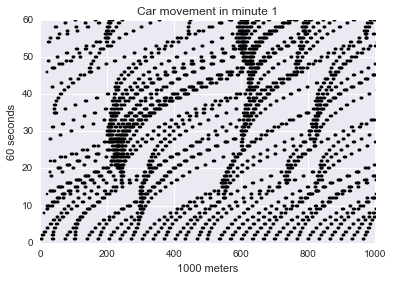

In [4]:
positions_0_matrix = np.matrix(arrange_data(positions[0]))
positions_10_matrix = np.matrix(arrange_data(positions[1]))
positions_35_matrix = np.matrix(arrange_data(positions[2]))
positions_75_matrix = np.matrix(arrange_data(positions[3]))
positions_100_matrix = np.matrix(arrange_data(positions[4]))

# for sec_list in positions[0]:
#     sec_list = np.ndarray.flatten(np.array(sec_list))
#     positions_0_matrix.append(sec_list)

# positions_0_matrix = np.matrix(positions_0_matrix)

y = [[n] * 150 for n in range(1, 61)]
x = np.ndarray.flatten(positions_0_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('1000 meters')
ax.set_ylabel('60 seconds')
ax.set_title('Car movement in minute 1')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

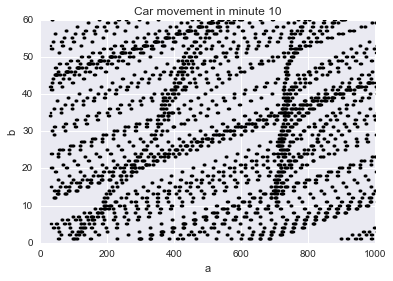

In [5]:
x = np.ndarray.flatten(positions_10_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Car movement in minute 10')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

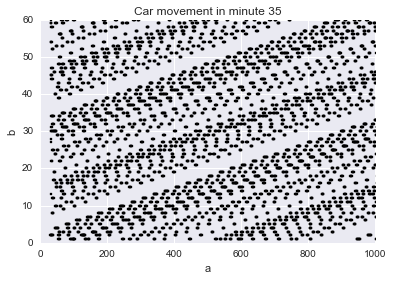

In [6]:
x = np.ndarray.flatten(positions_35_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Car movement in minute 35')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

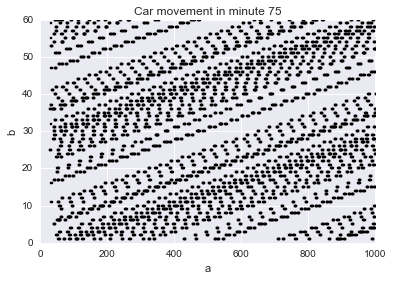

In [7]:
x = np.ndarray.flatten(positions_75_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Car movement in minute 75')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

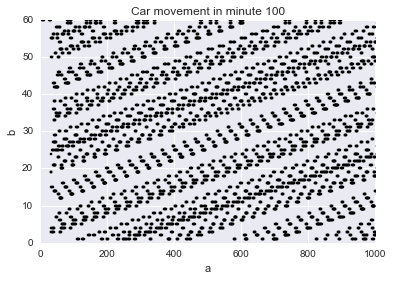

In [8]:
x = np.ndarray.flatten(positions_100_matrix)
fig, ax = plt.subplots()
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Car movement in minute 100')
plt.scatter(x, y, marker='s', color='k', s=3)
plt.show()

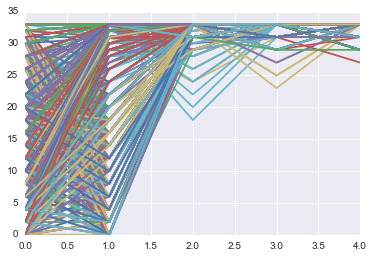

In [69]:
plt.plot(speeds)
plt.show()

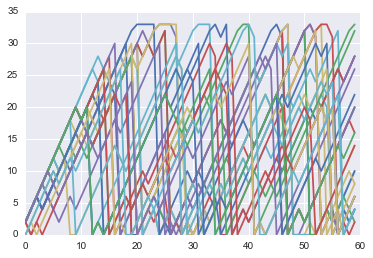

In [40]:
round_1 = np.reshape(np.array(speeds[0]), (60, 30))
plt.plot(round_1)
plt.show()

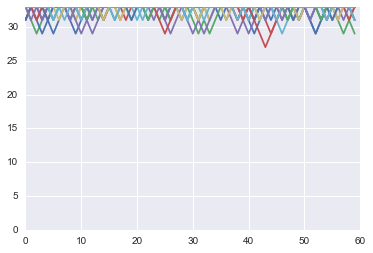

In [39]:
round_100 = np.reshape(np.array(speeds[4]), (60, 30))
plt.plot(round_100)
plt.axis([0.0, 60.0, 0.0, 33.0])
plt.show()

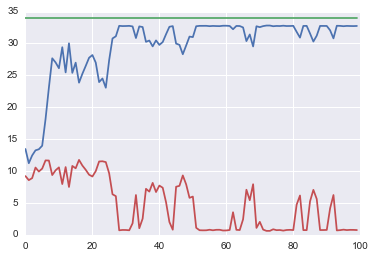

In [70]:
plt.plot(mean_speeds)
plt.plot(range(100), [speed_limit]*100)
plt.plot(st_devs)
plt.show()

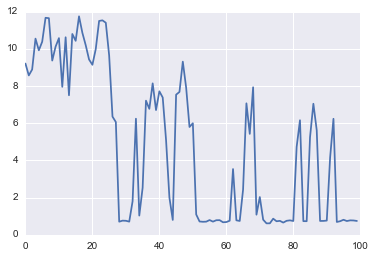

In [48]:
plt.plot(st_devs)
plt.show()

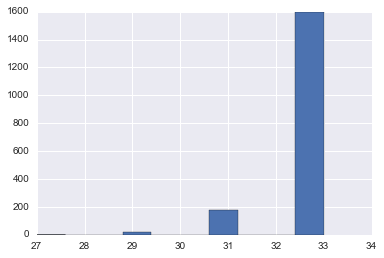

In [72]:
plt.hist(speeds[4])
plt.avline()
plt.show()